# Polynomial Regression Example

# 1. Define Target Function
We perform polynomial regression on the target function: $y=sin(2\pi{x})$.

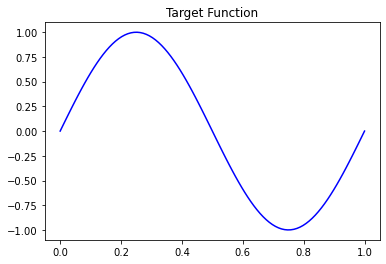

In [3]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)
y = np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.set_title('Target Function')
plt.plot(x,y, 'b')
plt.show()

# 2. Create Sample Data
We generate x-values equally distributed in $[0,1]$, and generate y-values by plugging x-values into the target function and adding some random normally distributed noise to the output.

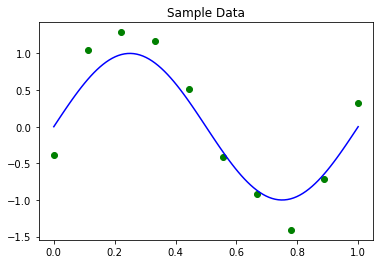

In [4]:
sample_size = 10
x_train = np.linspace(0, 1, sample_size)
y_train = np.sin(2*np.pi*x_train) + np.random.normal(0, 0.3, sample_size) #normally distributed random noise

fig, ax = plt.subplots()
ax.set_title('Sample Data')
plt.plot(x,y, 'b')
plt.scatter(x_train,y_train, c='g')
plt.show()

# 3. Take Linear Regression
Next, we use linear regression on the sample data for degrees 0 through 9, finding the polynomial of each degree that minimizes the mean-squared error over the training set. The red curves are the models we found from the sample data, and the blue curve is the target function.

Notice that for this small sample size, if the sample data contain sufficient amount of noise, then the polynomial models of high degree oscillate wildly. Such models cannot be good estimates of the target function, despite matching the sample data points perfectly. This is called "overfitting." For a large sample size (~100), this would not be as much of a problem.

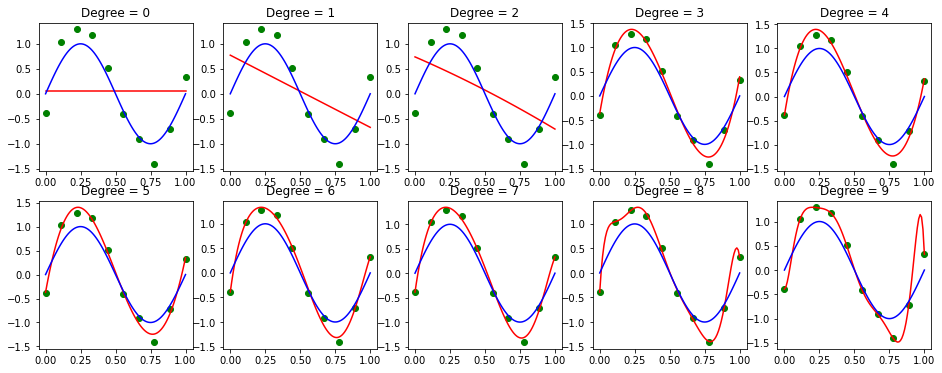

In [5]:
models = []

for i in range(10):
    model = np.poly1d(np.polyfit(x_train, y_train, i))
    models.append(model)
    

fig, axs = plt.subplots(2,5)
fig.set_size_inches(16,6)
for i in range(2):
    for j in range(5):
        axs[i,j].set_title('Degree = {}'.format(i*5 + j))
        axs[i,j].plot(x, models[i*5+j](x), 'r')
        axs[i,j].scatter(x_train, y_train, c='g')
        axs[i,j].plot(x, y, 'b')
plt.show()

We examine the coefficients in the "degree = 9" case and see that they are quite large. This generally happens with overfitting: the parameters vary wildly in order to perfectly interpolate the training data.

In [4]:
print(models[9])

           9             8             7             6             5
1.033e+05 x - 4.681e+05 x + 8.898e+05 x - 9.209e+05 x + 5.628e+05 x
              4             3        2
 - 2.057e+05 x + 4.322e+04 x - 4684 x + 195.8 x + 0.5244


# Ridge Regression Example
Ridge regression is a modified version of linear regression that seeks to control model complexity by restricting the size of the learned parameters. Recall that ridge regression finds the minimizer of $\min\limits_{\beta\in\mathbb{R}^d}\sum\limits_{i=1}^N(y_i-\langle{x_i},\beta\rangle)^2+\lambda\|\beta\|^2$. The code below uses ridge regression to find a degree 9 polynomial that isn't overfitted. Here, the lambda-value is chosed to be $\lambda=0.001$. Though we have an explicit formula for the minimizer, we just use the sklearn package again. By running this entire notebook multiple times (generating new training sets), we can see that the degree 9 ridge regression polynomial exhibits much less variance than the degree 9 polynomial found via standard linear regression.

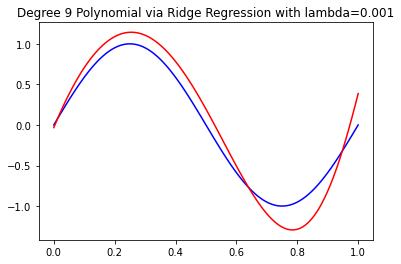

In [6]:
from sklearn.linear_model import Ridge

lam = 0.001

modified_x_train = np.stack((np.ones(sample_size), x_train, np.power(x_train, 2), np.power(x_train, 3), np.power(x_train, 4), np.power(x_train, 5), np.power(x_train, 6), np.power(x_train, 7), np.power(x_train, 8), np.power(x_train, 9)), axis=1)

model = Ridge(alpha = lam, fit_intercept = False)
model.fit(modified_x_train, y_train)

modified_x = np.stack((np.ones(x.size), x, np.power(x, 2), np.power(x, 3), np.power(x, 4), np.power(x, 5), np.power(x, 6), np.power(x, 7), np.power(x, 8), np.power(x, 9)), axis=1)
y_predicted = model.predict(modified_x)

fig, ax = plt.subplots()
ax.set_title('Degree 9 Polynomial via Ridge Regression with lambda={}'.format(lam))
plt.plot(x, y, c='b')
ax.plot(x, y_predicted, 'r')
plt.show()